In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
os.chdir("C:\\Users\\Acer\\titanic")
os.getcwd()


'C:\\Users\\Acer\\titanic'

In [3]:
df=pd.read_csv("C:\\Users\\Acer\\titanic\\train.csv")

#df['Sex']=df['Sex'].map( {'male':1, 'female':0} )

#df.drop(['Cabin','Name', 'Age', 'Embarked', 'Ticket','PassengerId', 'Sex'], axis=1,inplace=True)
df1=df.pop('Survived')
df['Survived']=df1
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [4]:
df['Age'].fillna(value=df['Age'].median(skipna=True), inplace=True)
cut_points = [0,5,12,18,35,60,100]
label_names = ["Infant","Child","Teenager","Young Adult","Adult","Senior"]
df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Age_categories
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,Young Adult
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,Adult
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Young Adult
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,Young Adult
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,Young Adult


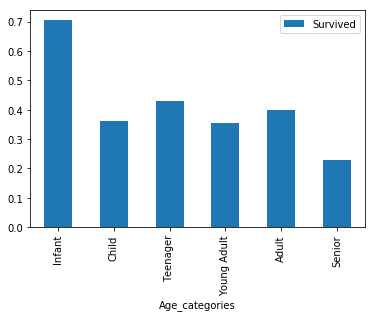

In [5]:
pivot = df.pivot_table(index="Age_categories",values='Survived')
pivot.plot.bar()
plt.show()

In [6]:
def dummies(column_name, df):
    dummy=pd.get_dummies(df[column_name], prefix=column_name)
    df=pd.concat([df,dummy], axis=1)
    return df
for column in ['Pclass', 'Sex', 'Age_categories']:
    df=dummies(column, df)
    
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Pclass_2,Pclass_3,Sex_female,Sex_male,Age_categories_Infant,Age_categories_Child,Age_categories_Teenager,Age_categories_Young Adult,Age_categories_Adult,Age_categories_Senior
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,...,0,1,0,1,0,0,0,1,0,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,...,0,0,1,0,0,0,0,0,1,0
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,...,0,1,1,0,0,0,0,1,0,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,...,0,0,1,0,0,0,0,1,0,0
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,...,0,1,0,1,0,0,0,1,0,0


In [7]:
df.drop(['Cabin','Name', 'Age', 'Age_categories', 'Embarked', 'Ticket','PassengerId', 'Sex', 'Pclass'], axis=1,inplace=True)
df1=df.pop('Survived')
df['Survived']=df1
df.head()

,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Age_categories_Infant,Age_categories_Child,Age_categories_Teenager,Age_categories_Young Adult,Age_categories_Adult,Age_categories_Senior,Survived
0,1,0,7.2500,0,0,1,0,1,0,0,0,1,0,0,0
1,1,0,71.2833,1,0,0,1,0,0,0,0,0,1,0,1
2,0,0,7.9250,0,0,1,1,0,0,0,0,1,0,0,1
3,1,0,53.1000,1,0,0,1,0,0,0,0,1,0,0,1
4,0,0,8.0500,0,0,1,0,1,0,0,0,1,0,0,0


In [8]:
print(df.isnull().sum())
print(df.shape)

SibSp                         0
Parch                         0
Fare                          0
Pclass_1                      0
Pclass_2                      0
Pclass_3                      0
Sex_female                    0
Sex_male                      0
Age_categories_Infant         0
Age_categories_Child          0
Age_categories_Teenager       0
Age_categories_Young Adult    0
Age_categories_Adult          0
Age_categories_Senior         0
Survived                      0
dtype: int64
(891, 15)


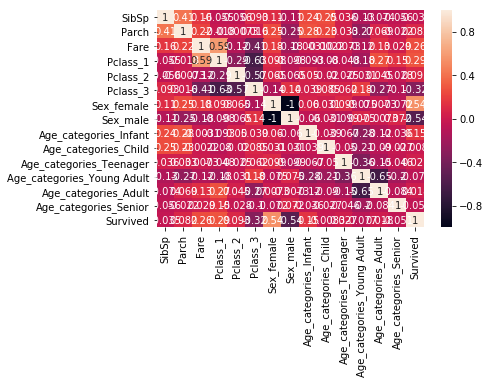

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.corr(), annot=True)

In [10]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

data=df.values
X=data[:,0:14]
Y=data[:,14]


min_max_scaler = preprocessing.MinMaxScaler()
X_scale=min_max_scaler.fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=3)


In [11]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
from sklearn.tree import DecisionTreeClassifier 
model = DecisionTreeClassifier(criterion="entropy", max_depth=12)

# Train Decision Tree Classifer
model.fit(X_train,Y_train)
prediction=model.score(X_test, Y_test)
print(prediction)


0.7892376681614349


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


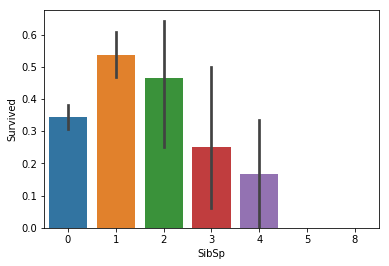

In [13]:
sns.barplot(x='SibSp', y='Survived', data=df)

In [14]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_scale, Y, cv=10)
scores.sort()
accuracy = scores.mean()

print(scores)
print(accuracy)

[0.73033708 0.77777778 0.78651685 0.79775281 0.80898876 0.80898876
 0.81111111 0.81818182 0.83146067 0.84269663]
0.8013812280104414


In [15]:
dft=pd.read_csv("C:\\Users\\Acer\\titanic\\test.csv")
passenger=dft['PassengerId']
dft['Age'].fillna(value=dft['Age'].median(skipna=True), inplace=True)
cut_points = [0,5,12,18,35,60,100]
label_names = ["Infant","Child","Teenager","Young Adult","Adult","Senior"]
dft["Age_categories"] = pd.cut(dft["Age"],cut_points,labels=label_names)

for column in ['Pclass', 'Sex','Age_categories']:
    dft=dummies(column, dft)
    
dft.drop(['Cabin','Name', 'Age', 'Age_categories', 'Embarked', 'Ticket','PassengerId', 'Sex', 'Pclass'], axis=1,inplace=True)
dft.head()

,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Age_categories_Infant,Age_categories_Child,Age_categories_Teenager,Age_categories_Young Adult,Age_categories_Adult,Age_categories_Senior
0,0,0,7.8292,0,0,1,0,1,0,0,0,1,0,0
1,1,0,7.0000,0,0,1,1,0,0,0,0,0,1,0
2,0,0,9.6875,0,1,0,0,1,0,0,0,0,0,1
3,0,0,8.6625,0,0,1,0,1,0,0,0,1,0,0
4,1,1,12.2875,0,0,1,1,0,0,0,0,1,0,0


In [16]:
dft['Fare'].fillna(value=dft['Fare'].median(skipna=True), inplace=True)
dft.isnull().sum()

SibSp                         0
Parch                         0
Fare                          0
Pclass_1                      0
Pclass_2                      0
Pclass_3                      0
Sex_female                    0
Sex_male                      0
Age_categories_Infant         0
Age_categories_Child          0
Age_categories_Teenager       0
Age_categories_Young Adult    0
Age_categories_Adult          0
Age_categories_Senior         0
dtype: int64

In [17]:
testdata=dft.values
Xt=testdata
Xt_scale=min_max_scaler.fit_transform(Xt)

In [18]:
Yt_pred=model.predict(Xt_scale).astype(int)
print(Yt_pred)

[0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 1 0 1 0 0
 0 0 1 0 1 0 1 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 1 0 1 0 0 1 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0
 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0
 1 1 0 1 1 1 0 1 0 0 0]


In [19]:
pred_df=pd.Series(Yt_pred)
submission=pd.DataFrame({'PassengerId':passenger})
submission['Survived']=pred_df
filename = 'Titanic Predictions .csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: Titanic Predictions .csv
